# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2022/wiki/Assignment-1-and-2) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday February 28th, 2022 at 23:59. Hand in your files via [http://peergrade.io](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have 1 week to evaluate a few assignments written by other members of the class_. Thus, the peer evaluations are due on Monday March 7th, 2022 at 23:59.

## Part 1: Visualizing patterns in the data

In this exercise, please generate the visualizations described below. Use the same date-ranges as in Week 2. For each set of plots, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).

We look only at the focus-crimes in the exercise below.

In [1]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

<h5 style="background-color:LemonChiffon"> <i><b>1.1: Weekly patterns:</b></i> Basically, we'll forget about the yearly variation and just count up what happens during each weekday.
Make your own version of the plot and comment your results.
</h5>

In [2]:
%%capture
#Comment the above line to see the installation progress for each lib.

#Install all deps
%pip install nbformat
%pip install pandas
%pip install numpy
%pip install scipy
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install datetime
%pip install folium

In [3]:
#Importing libs
import sys
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import json
import plotly.express as px
import datetime as dt
import folium
from folium import plugins
from folium.plugins import HeatMap

In [4]:
#Global Settings
pd.set_option("display.precision", 3) #pandas round the values on-display

In [5]:
#Load the data in pandas
src_path = "./files/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv"
df = pd.read_csv(src_path, header=0, parse_dates=[["Date", "Time"]])
print()

In [6]:
#===Pre-processing===
#Remove junk columns
df = df.iloc[:,0:13]

#Handle empty or NaN values
df['PdDistrict'].fillna(df['PdDistrict'].mode()[0], inplace = True)

#Create dates columns
df["Date"] = df["Date_Time"].dt.date
df["Time"]=df["Date_Time"].dt.time
df["Year"] = df["Date_Time"].dt.year
df["Month"] = df["Date_Time"].dt.month
df["Day"] = df["Date_Time"].dt.day
df["DayOfWeek"] = df["Date_Time"].dt.weekday
df["Hour"] = df["Date_Time"].dt.hour
df["HourOfWeek"] = df["DayOfWeek"]*24+df["Hour"]

#Remove 2018 data (incomplete year):
df = df[df["Year"] != 2018]

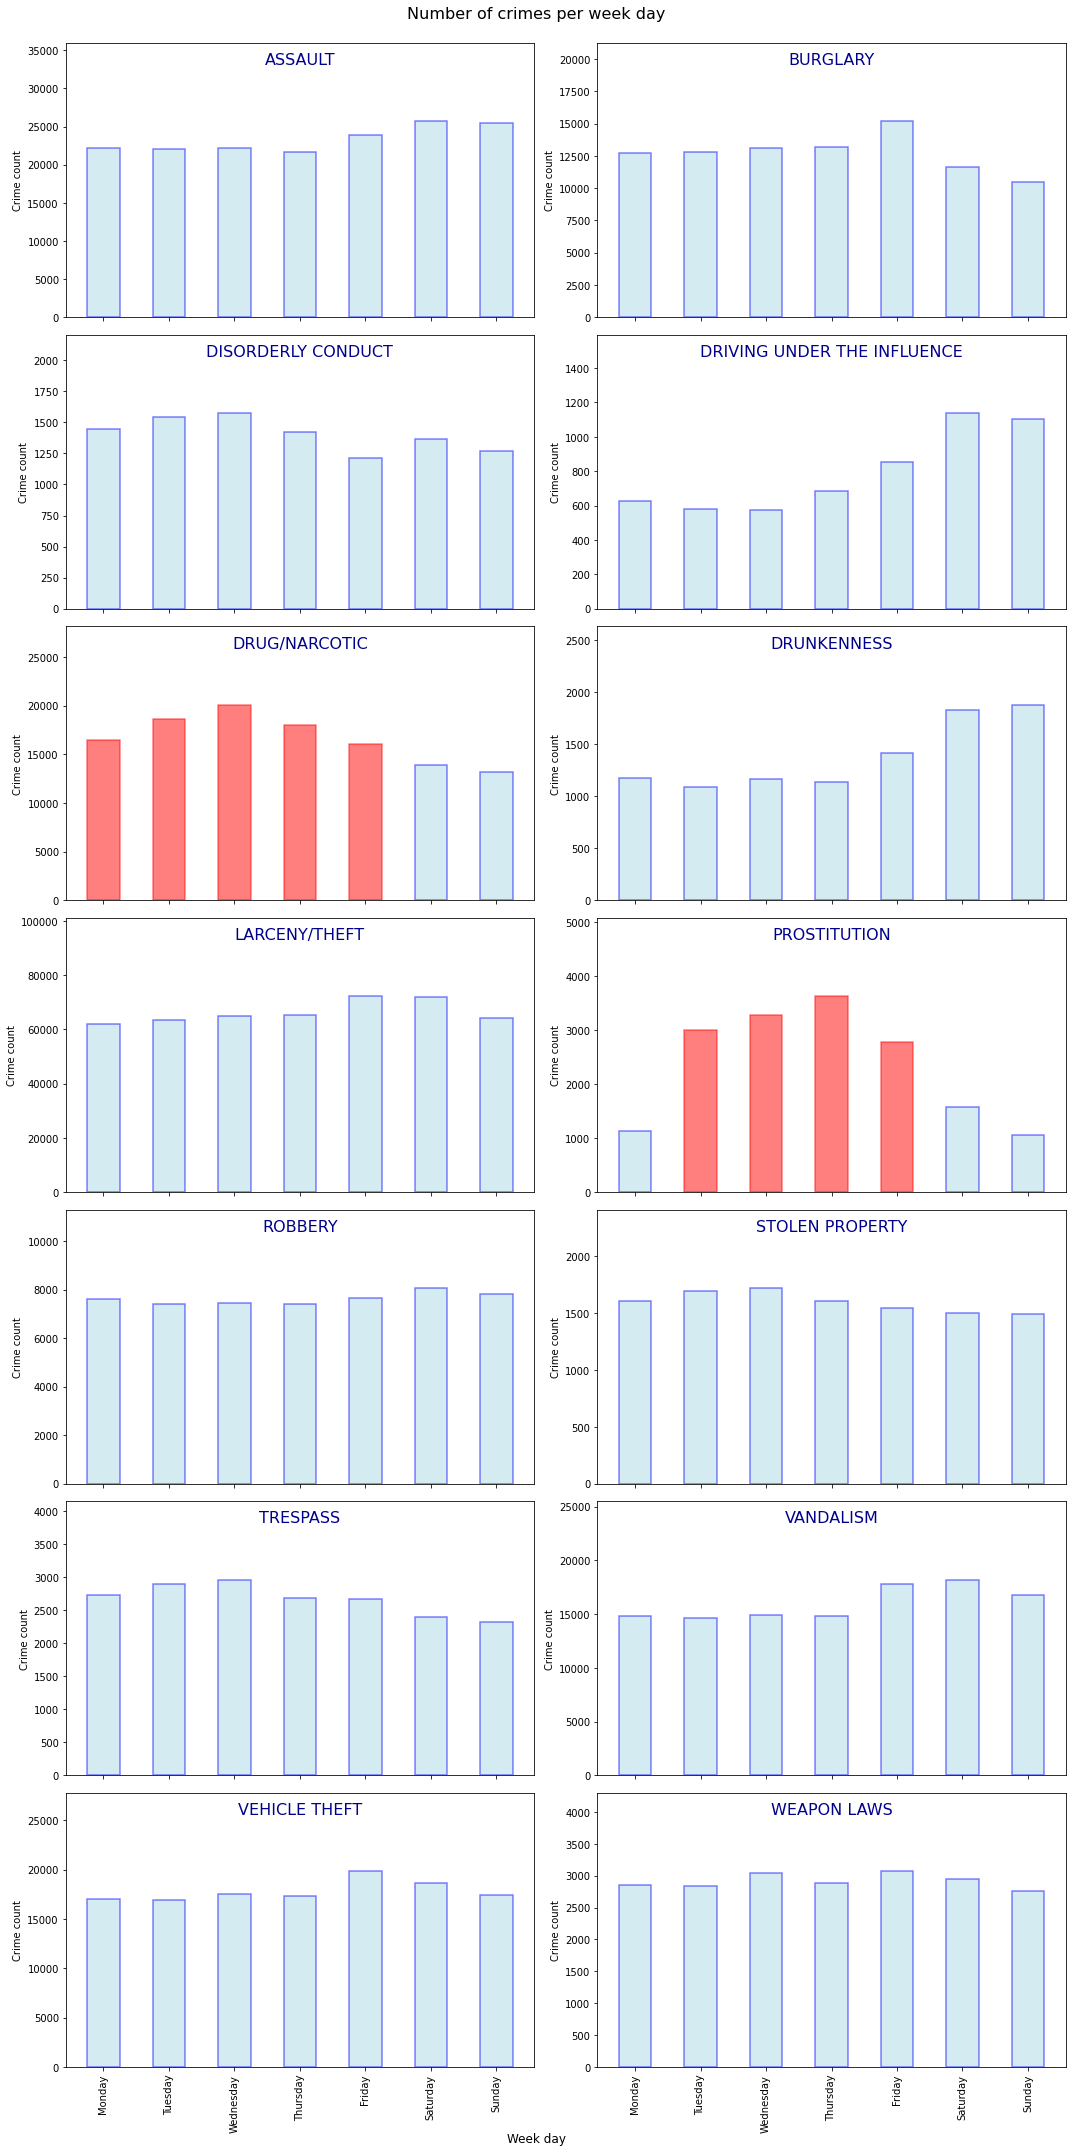

In [7]:
#Crime by day of the week for focus categories
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

#Group by category on timeframe
counts = df.groupby(by=["DayOfWeek", "Category"]).size().reset_index(name="counts")

#Limit to focus crimes
counts = counts.loc[counts['Category'].isin(focuscrimes)].reset_index(drop=True)
focuscrimes = sorted(list(focuscrimes))

#x-labels: 
week_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

#Plotting
fig, axes=plt.subplots(len(focuscrimes)//2, 2, figsize=(15,30), sharex=True)
fig.supxlabel('Week day', size=12)
axes = axes.flatten() #Flatten the plots lists to iterate over
plt.suptitle("Number of crimes per week day", y=1.0, fontsize=16)

for i in range(len(focuscrimes)):
    #Get the specific crime i
    tmp = counts.loc[counts['Category'] == focuscrimes[i]]

    #Extract x y for easier plotting
    x = tmp["DayOfWeek"]
    y = tmp["counts"]
    b = axes[i].bar(x, y, width=0.5, edgecolor="blue", color="lightblue", alpha=0.5, linewidth=1.5)
    
    #Labeling
    axes[i].set_title(focuscrimes[i], x=0.5, y=0.9, color="darkblue", fontsize=16)
    axes[i].set_xticks(x, week_days, rotation=90)
    axes[i].set_ylim(top=(np.max(y)*1.4))
    axes[i].set_ylabel("Crime count")

    #Highlight surprising trends!
    if focuscrimes[i]=="PROSTITUTION":
        for x in range(1,5):
            b[x].set_color("r")
    if focuscrimes[i]=="DRUG/NARCOTIC":
        for x in range(5):
            b[x].set_color("r")
    plt.tight_layout()
plt.show()

**Comments:**

`DRUNKENNESS`, `DRIVING UNDER THE INFLUENCE`, `VANDALISM`, and `ASSAULT` are higher during the weekends, which is expected: people are more likely to be out and drinking. It is, however, surprising that `DRUNKENNESS` have higher numbers reported on Saturday and Sunday than Friday. It could be that because most incidents occur late at night (after midnight), the late Friday drinking nights are recorded on Saturday. This will be further explored in the hourly plot of crimes' occurrences.

`BURGLARIES` happen the most on Fridays. This is probably because people are most likely to go out after finishing the last day of work to relax and have fun, which means fewer people are staying at home, and a better opportunity for burglaries to steal.

`NARCOTIC` and `PROSTITUTION` are higher during weekdays, which is surprising. `PROSTITUTION` is highest on a Thursday. We speculate that law enforcements might be more forgiving during the weekends for these two categories, or law enforcements might assume people are having harmless fun on the weekends. It could also reflect a lack of police resources due to increased crimes in other more critical categories on the weekends. It is also possible that `PROSTITUTION` and `NARCOTIC` are actually more prevalent during the weekdays, irrespective of police resources or practices. If this assumption is valid, then the reason for such an increase during weekdays is unclear: perhaps this is how people deal with their stress and emptiness after finishing long workdays in San Francisco working for tech companies!

`LARCENY/THEFT` is the most reported crime in San Francisco. This crime is common throughout the week, with a modest increase on Fridays and Saturdays. Perhaps drunk people are leaving their cars (and some belongings inside) behind as they do not drive while drunk, which is reflected in the relatively low count of `DRUNKENNESS` and `DRIVING UNDER THE INFLUENCE` in these periods. Thieves would then break into these cars to take whatever is left inside.

<h5 style="background-color:LemonChiffon"> <b><i>1.2: Hours of the week</i></b>. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight. Visualize and comment your results.
</h5>

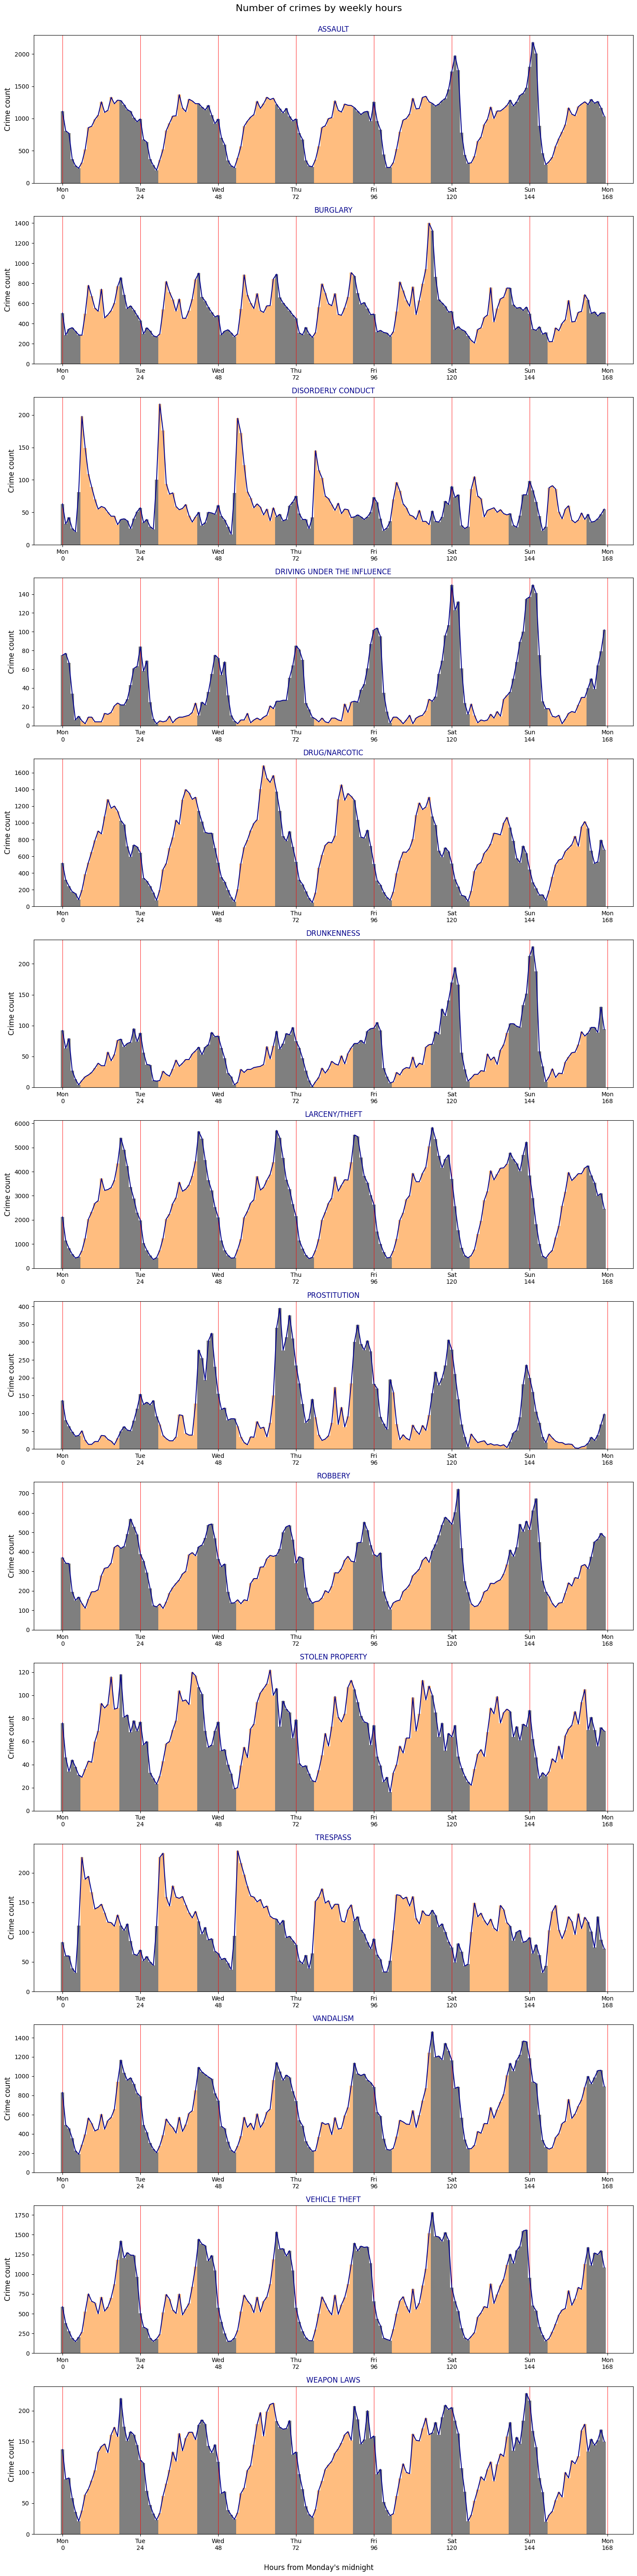

In [30]:
#crime by hour of the week
#Highlight sunlight hours (06 to 18) in orange on the graph. Nighttime hours are in black/gray

#extract the data for focus crime
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

#Group by category an timeframe
counts = df.groupby(by=["HourOfWeek", "Category"]).size().reset_index(name="counts")

#Limit to focus crimes
counts = counts.loc[counts['Category'].isin(focuscrimes)].reset_index(drop=True)
focuscrimes = sorted(list(focuscrimes))

#Plotting
#Define x labels
x_labels=[x*24 for x in range(8)]
x_names = [
    "Mon\n0",
    "Tue\n24",
    "Wed\n48",
    "Thu\n72",
    "Fri\n96",
    "Sat\n120",
    "Sun\n144",
    "Mon\n168"
]

fig, axes=plt.subplots(len(focuscrimes), 1, figsize=(15,60))
fig.supxlabel("Hours from Monday's midnight", y=0, fontsize=12)
axes = axes.flatten()
plt.suptitle("Number of crimes by weekly hours", y=1, fontsize=16) #main title

for i in range(len(focuscrimes)):
    tmp = counts.loc[counts['Category'] == focuscrimes[i]]
    x = tmp["HourOfWeek"]
    y = tmp["counts"]

    #Use different bar colors for day and night hours
    colors = ["#Ff7d00" if (j%24 >= 6) and (j%24 < 18) else "black" for j in x]
    
    b = axes[i].bar(x, y, width=1.0, color=colors, alpha=0.5, linewidth=1.5)
    axes[i].plot(x,y,linestyle='-', color="darkblue", marker="")
    axes[i].set_title(focuscrimes[i], color="darkblue")
    axes[i].set_xticks(ticks=x_labels, labels=x_names)
    axes[i].set_ylabel("Crime count", fontsize=12)
    axes[i].grid(which="major", axis="x", color="r", alpha=0.8)
    plt.tight_layout()
plt.show()

**Comments:**

The plot highlights sunlights hours in orange (06 to 18), and nighttime in black for each day.

Most crimes seem to be cyclical as they depend primarily on the time of the day. However, there are differences in the peak and trough values for some crimes as a function of both the day and time.  

In general, most stealing and thief crimes occur at night, with the highest occurrences on Fridays and Saturdays, when people are typically out and probably drinking in San Francisco.

`ASSAULT`, `DRUNKENNESS`, and `DRIVING UNDER THE INFLUENCE` all peak on Fridays and Saturdays late around midnight. It is not surprising to see these crimes peak together, as heavy drinking can lead to `ASSAULT` and `DRIVING UNDER THE INFLUENCE` due to verbal abuse and reckless behavior while people are intoxicated. 

There is also a significant spike in `BURGLARIES` around 6 pm on Fridays. It is worth noting that the time of each crime is the reporting time, not the actual time of the crime's occurrence. People may discover the burglaries after they return home on Friday from work. Many people work in remote locations or travel for work (crime data is recorded before COVID-19) and only return home at the weekend, which might explain the sudden spike on Fridays for burglaries that might have been committed even before Friday. Alternatively, criminals also assume that people would not be home on Fridays, so the criminals commit the crimes when people are least expected to be home. 

`TRESPASS` and `DISORDERLY CONDUCT` occur mainly during 8-10 am on weekdays. We previously concluded that this is due to the homelessness problem in San Francisco. Nevertheless, what is surprising is the decline in these crimes on Thursdays, Fridays, Saturdays, and Sundays. It is unclear why this is the case here. We speculate that homelessness relief programs that provide shelter for some days of the week might be an influence. Many such programs are run by charities and churches, explaining the sharp decline of these crimes on Sundays.

`PROSTITUTION` trend is still perplexing. There are large spikes on Tuesdays, Wednesdays, and Thursdays, with the highest spikes occurring from 6 pm to midnight. The relatively low numbers on Monday (even at night) are interesting. Also, spikes over on Fridays and Saturdays are captured in this plot but were not captured before. It is challenging to explain these trends; we still speculate it is due to policing management of resources and best practices. 


<h5 style="background-color:LemonChiffon"> <i><b>1.3: Spatial patterns:</b></i> Spatial patterns*. Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical:

<i><b>1.3a</i></b> For each district plot the ratio `P(crime|district)/P(crime)` for the 14 focus crimes (follow and *show* the steps in Week 2 Ex. 2.2 for success).

</h5>

In [9]:
#Calculate P(crime)
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
focuscrimes = sorted(list(focuscrimes))

#Count crime in each category
counts = df.groupby(by=["Category"]).size().reset_index(name="counts")

#Limit to focus crime
counts = counts.loc[counts['Category'].isin(focuscrimes)].reset_index(drop=True)

#Convert to ratios
counts["P(Crime)"]=counts["counts"]/counts["counts"].sum()

In [10]:
#Calculate P(crime|district)
counts_by_dist = df.groupby(by=["PdDistrict", "Category"]).size().reset_index(name="counts")
counts_by_dist = counts_by_dist.loc[counts_by_dist['Category'].isin(focuscrimes)].reset_index(drop=True)
districts = sorted(df["PdDistrict"].unique())

#Get the districts into columns using pivot tables
counts_by_dist_pivot = counts_by_dist.pivot_table(columns="PdDistrict", index="Category", values="counts", aggfunc=np.sum)

#Convert to % (or probabilities) given each district
for dist in districts:
    counts_by_dist_pivot[dist]=counts_by_dist_pivot[dist]/(counts_by_dist_pivot[dist]).sum()

In [11]:
#Calculate P(crime|district)/P(crime)

#Flatten and copy the pivot table:
counts_by_dist_ratio =  counts_by_dist_pivot.reset_index().copy()

#Make the calculation
for dist in districts:
    counts_by_dist_ratio[dist]=counts_by_dist_ratio[dist]/(counts["P(Crime)"])

#Show final results
counts_by_dist_ratio

PdDistrict                     Category  BAYVIEW  CENTRAL  INGLESIDE  MISSION  \
0                               ASSAULT    1.327    0.848      1.239    1.154   
1                              BURGLARY    1.176    1.093      1.094    0.805   
2                    DISORDERLY CONDUCT    0.606    0.929      0.439    1.990   
3           DRIVING UNDER THE INFLUENCE    0.893    0.642      1.117    1.229   
4                         DRUG/NARCOTIC    0.912    0.302      0.521    1.233   
5                           DRUNKENNESS    0.644    1.095      0.571    1.406   
6                         LARCENY/THEFT    0.638    1.335      0.661    0.773   
7                          PROSTITUTION    0.092    1.005      0.058    3.376   
8                               ROBBERY    1.260    0.830      1.392    1.221   
9                       STOLEN PROPERTY    0.867    1.094      0.876    1.036   
10                             TRESPASS    0.930    1.110      0.618    1.181   
11                            VANDALISM    1.344    0.964      1.384    0.920   
12                        VEHICLE THEFT    1.471    0.706      1.994    1.045   
13                          WEAPON LAWS    2.161    0.531      1.529    1.204   

PdDistrict  NORTHERN   PARK  RICHMOND  SOUTHERN  TARAVAL  TENDERLOIN  
0              0.802  0.812     0.742     0.933    0.915       1.207  
1              1.133  1.430     1.330     0.747    1.350       0.449  
2              0.823  1.103     0.422     0.731    0.525       2.088  
3              0.770  1.363     2.617     0.732    1.367       0.507  
4              0.646  0.894     0.340     0.959    0.386       3.774  
5              0.602  1.475     0.677     1.203    0.953       1.190  
6              1.222  0.974     1.128     1.299    0.936       0.604  
7              1.734  0.020     0.072     0.229    0.353       1.423  
8              0.839  0.732     0.633     0.949    0.841       1.139  
9              1.127  0.757     0.828     1.234    0.752       0.845  
10             0.817  0.774     0.605     1.106    0.787       1.662  
11             0.909  1.040     1.263     0.824    1.410       0.428  
12             0.847  1.377     1.418     0.494    1.561       0.221  
13             0.663  0.753     0.621     0.764    0.852       1.139

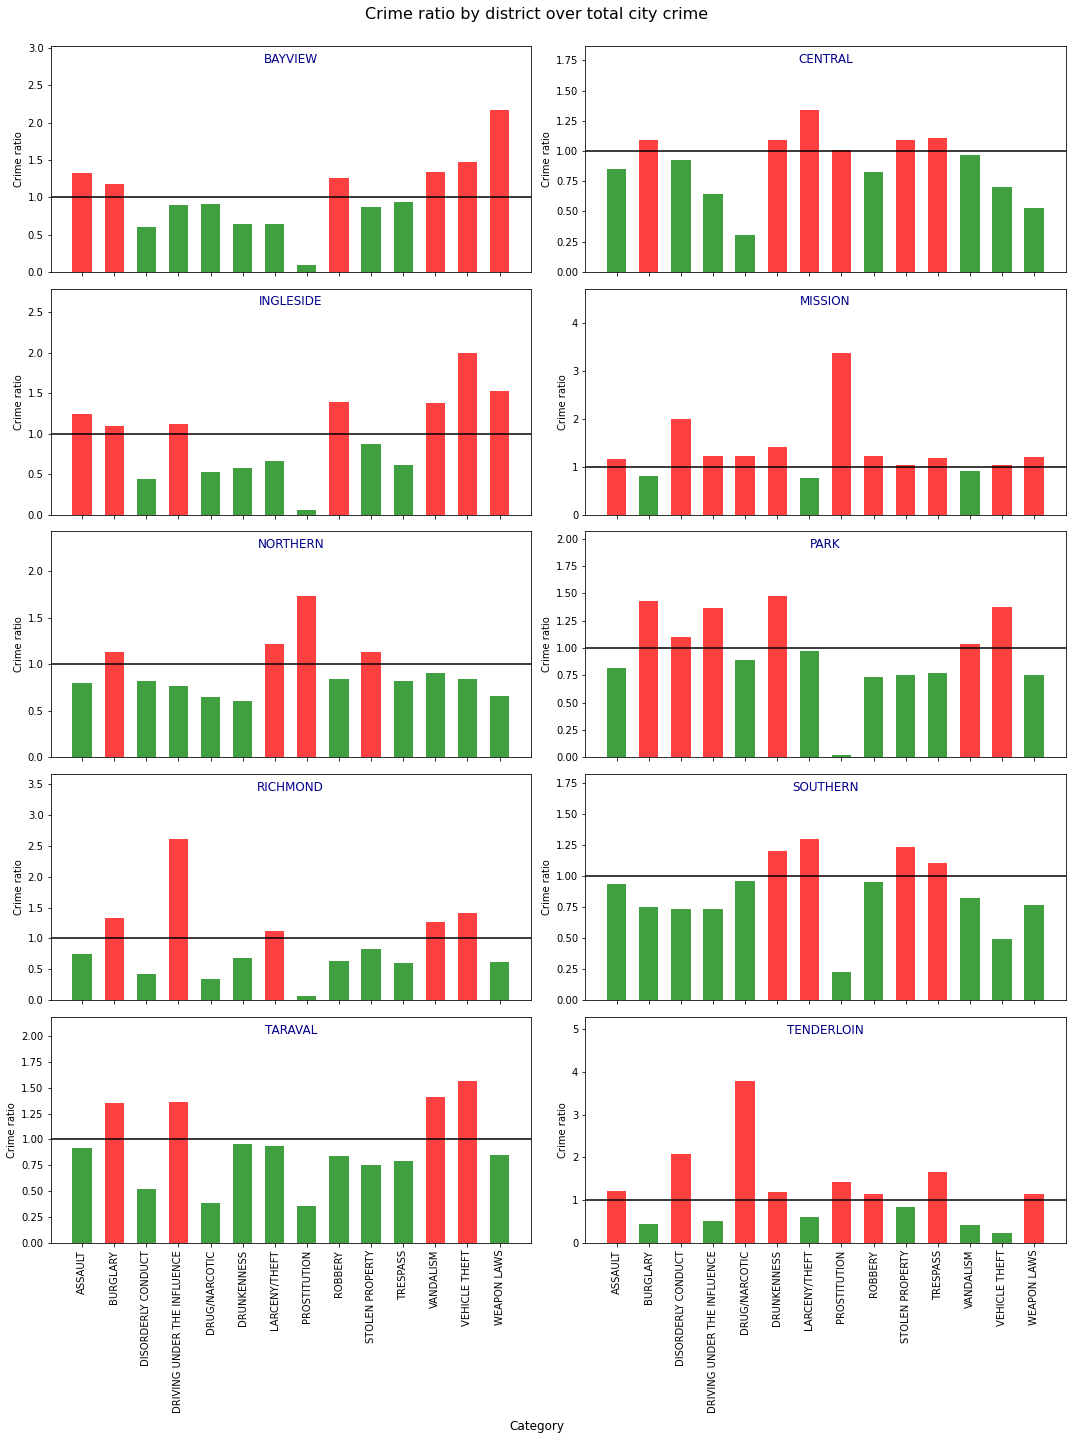

In [12]:
#Plotting
#Ratios larger than 1 are plotted in red. Otherwise the ratio is plotted in green

#Define x labels
x_labels= counts_by_dist_ratio["Category"].tolist()
districts = sorted(df["PdDistrict"].unique())

fig, axes=plt.subplots(len(districts)//2, 2, figsize=(15,20), sharex=True)
fig.supxlabel("Category", size=12) #common x-axis
axes = axes.flatten()
plt.suptitle("Crime ratio by district over total city crime", y=1, fontsize=16) #main title

for i in range(len(districts)):
    tmp = counts_by_dist_ratio
    x = tmp["Category"]
    y = tmp[districts[i]]

    #Color mask
    colors = ["red" if j > 1 else "green" for j in y]

    b = axes[i].bar(x, y, width=0.6, color=colors, alpha=0.75, linewidth=1.5)

    #Labeling:
    axes[i].axhline(y=1, color="black", linestyle="-", alpha=1)
    axes[i].set_title(districts[i], x=0.5, y=0.9, color="darkblue")
    axes[i].set_xticks(x_labels, x_labels, rotation=90)
    axes[i].set_ylabel("Crime ratio")
    axes[i].set_ylim(top=(np.max(y)*1.4))

    plt.tight_layout()
plt.show()

**Comments:**

Ratios that are larger than one are plotted in red, while other ratios are plotted in green.

Crimes are not distributed equally across the city. We can see some outliers that skew the number of crimes in each district. It is thus erroneous to assume San Francisco has a high or low crime of a particular type everywhere without analyzing the data by district.

For instance, `PROSTITUTION` is exceptionally high in the Mission district ($ratio = 3.4$); it is also high but to a lesser extent in Northern ($ratio=1.7$) and Tenderloin ($ratio=1.4$). All other districts have ratios that are close to 1 or much lower. Assuming equally competent policing across districts, perhaps more resources should be devoted to these districts to alleviate the issue. There could be some deeper problems in these districts that lead to an increase in this crime. Policy decisions from other districts that have very low ratios, such as Park ($ratio = 0.02$),can be modified to fit the districts with high `PROSTITUTION`.

The Mission district has the worst performance in terms of crimes’ categories: 11 out of 14 crimes’ categories have higher ratios than the city ratio (larger than one).

<h5 style="background-color:LemonChiffon"><i><b>1.3b</i></b>. Comment on the top crimes in Tenderloin, Mission, and Richmond. Does this fit with the impression you get of these neighborhoods on Wikipedia?
</h5>

First, we plot the crime ratios for the three districts separetly.

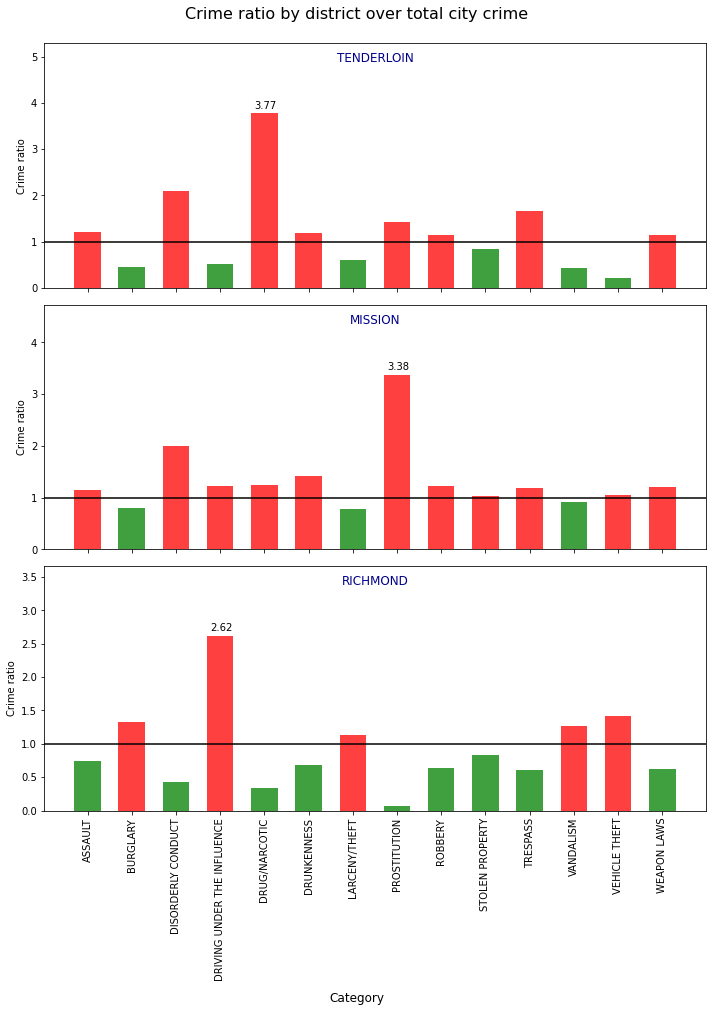

In [13]:
#Plotting
#Ratios larger than 1 are plotted in red. Otherwise the ratio is plotted in green

#Define x labels
x_labels= counts_by_dist_ratio["Category"].tolist()
districts=["TENDERLOIN", "MISSION", "RICHMOND"]

fig, axes=plt.subplots(3, 1, figsize=(10,14), sharex=True)
fig.supxlabel("Category", size=12) #common x-axis
axes = axes.flatten()
plt.suptitle("Crime ratio by district over total city crime", y=1, size=16) #main title

for i in range(len(districts)):
    tmp = counts_by_dist_ratio
    x = tmp["Category"]
    y = tmp[districts[i]]

    #Color mask
    colors = ["red" if j > 1 else "green" for j in y]

    b = axes[i].bar(x, y, width=0.6, color=colors, alpha=0.75, linewidth=1.5)

    #Labeling
    axes[i].axhline(y=1, color="black", linestyle="-", alpha=1)
    axes[i].set_title(districts[i], x=0.5, y=0.9, color="darkblue")
    axes[i].set_xticks(x_labels, x_labels, rotation=90)
    axes[i].set_ylabel("Crime ratio")
    axes[i].set_ylim(top=(np.max(y)*1.4))

    #Annotate max crime ratio in each district
    #Get the values
    y_ann = y.max()
    x_ann = tmp.loc[y == y_ann]["Category"].tolist()

    #Draw the values
    axes[i].annotate(round(y_ann,2), xy=(x_ann, y_ann), xycoords="data", xytext=(-10,5), textcoords="offset points")

    plt.tight_layout()
plt.show()

<h5 style="background-color:LemonChiffon"><i><b>1.3b</i></b>. Explain why crime is high in these categories based on the wikis?
</h5>

**Tenderloin** is rated as a "high crime" area by wikipedia. This mirrors in the provided data. Furthermore, it is said to be an artsy neighborhood with mixed ethics. Therefore, especially the high ratio for `DRUG/NARCOTIC` ($ratio = 3.77$) is not that surprising. Also the higher ratio for `PROSTITUTION` ($ratio=1.42$) could be expected after reading the Wikipedia article, which points out that there are many "hour hotels" and a "seedy reputation" for the area. However, the crime occurrence spikes significantly between different crime categories and there are also categories with surprisingly low occurrence, as for example `VEHICLE THEFT` and `VANDALISM`.  

**Mission** is supposed to be one of the most trendy areas of San Francisco, according to Wikipedia. It's a "must-visit" for tourists and packed with trendy boutiques and restaurants. While for Tenderloin, "Crime" was one of the main catagories on the Wikipedia page, for Mission no such division even exists. However, the data tells a different story with especially `PROSTITUTION` ($ratio=3.38$) rating very high, but also in total 11 of the 14 crime categories have a ratio larger than one. Speculating about this, it is likely that the mentioned tourism and the crime occurrence are connected. As tourism brings money and money causes envy and greed. Also, where is money, people see business opportunities in all kinds of areas, and tourists might not behave as well as they would in their own home areas.

**Richmond** is a huge neighborhood with both, commercial districts as well as family-home areas. People who live there are in general rather wealthier with high value possessions. The crime data fits the picture that wikipedia draws of the area. `VEHICLE THEFT`, `VANDALISM`, `LARCENY/THEFT` and `BURGLARY` are most expected in wealthy areas. What comes slightly surprising is the high ratio of `DRIVING UNDER THE INFLUENCE` ($ratio=2.62$). Yet, thinking about it and folowing thought traces of prejudice, it is likely that some business men have a drink or two too many, before quickly driving home after a business dinner. This would set these numbers into perspective.

## Part 2: Fundamentals of data visualization

In the exercise below, there is a selection of questions from Week 3, Part 1. Please, check it out if you have any doubt on how to solve the exercise.

<h5 style="background-color:LemonChiffon"><i><b>2.1:</b></i> Sune mentions in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. 
</h5>

There are several methods to select the bin size. One formula we like is the Freedman-Diaconis method, for it takes into account the *distribution* of the sample (not only the sample size as is common). It is described as the following [[source](https://medium.datadriveninvestor.com/how-to-decide-on-the-number-of-bins-of-a-histogram-3c36dc5b1cd8)]:

$$
\begin{aligned}
&\text { binwidth }=\frac{2(q 3-q 1)}{\sqrt[3]{n}} \\
&\text { bins }=\operatorname{ceil}\left(\frac{\max (x)-\min (x)}{\operatorname{binwidth}}\right)
\end{aligned}
$$

where $q3$ and $q1$ are the third and first interquantile values of the dataset. $n$ is the sample size, and the $ceil$ function is used to ensure the result is an integer.

We however must stress that no single method is perfect, and sometimes qualitative assessment can be helpful by plotting several histograms with different bin sizes.

Below is the implementation of the method in python code

In [14]:
import numpy as np
import pandas as pd

def bin_freedman(data, col) -> int:
    """
    return the bin size using the Freedman-Diaconis method
    input: 
        data: a pandas dataframe containing the column of interest
        col: the column of data for which the bin size is needed
    return:
        the bin size
    """
    #Get quantiles
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1

    bin_width = (2 * iqr) / (len(data[col]) ** (1 / 3))
    bin_count = int(np.ceil((data[col].max() - data[col].min()) / bin_width))

    return bin_count

<h5 style="background-color:LemonChiffon"><i><b>2.2:</b></i> Hypothesis testing: Use "data 1" and "data 2" to verify whether there is a statistically significant difference in the average number of steps taken by men and women. 

<i><b>2.2a:</i></b> Is there a statistically significant difference between the two groups? What is the difference between their mean number of steps? Plot two histograms to visualize the step-count distributions, and use the criterion you chose in the previous step to define the right bin-size and comment on your choice.

</h5>

In [15]:
#Load the data
df_f = pd.read_csv("./files/data9b_f.csv", header=0)
df_m = pd.read_csv("./files/data9b_m.csv", header=0)

df_f["sex"]="Female"
df_m["sex"]="Male"

#Combine into a single dataframe
df_fm = pd.concat([df_f, df_m], ignore_index=True)

#Print means 
df_by_sex=df_fm.groupby(by=["sex"])
print("The means by sex:\n")
df_by_sex.mean()

The means by sex:



steps     bmi
sex                     
Female  6857.763  25.145
Male    7792.545  25.103

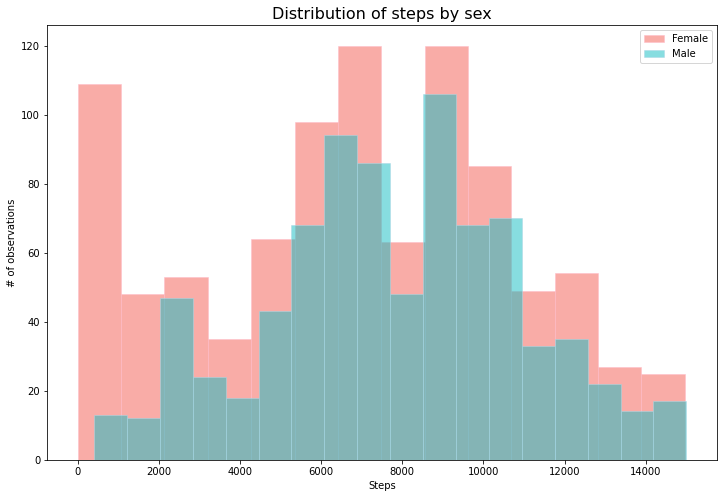

In [16]:
#Get the bins using the Freedman method
bin_m = bin_freedman(df_m, "steps")
bin_f = bin_freedman(df_f, "steps")

#Plot the histograms for each sex
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df_f["steps"],  bins=bin_f,  label="Female",  color="#f6756d", alpha=0.6, edgecolor="pink")
ax.hist(df_m["steps"],  bins=bin_m,  label="Male",    color="#10bdc3", alpha=0.5, edgecolor="lightblue")
ax.set_xlabel("Steps")
ax.set_ylabel("# of observations")
ax.set_title("Distribution of steps by sex", fontsize=16)
ax.legend()
plt.show()

**Comments:**

The distribution of steps is relatively similar between the two sexes. It is worth noting that there is a large number of females with less than 2000 steps.

In [17]:
#t-test of the difference of the means of the two samples
#By default, equal variance between the two populations is assumed
    #Pass equal_var=False otherwise
var = "steps"
st.ttest_ind(df_f[var],df_m[var], equal_var=False)

Ttest_indResult(statistic=-5.630498556069397, pvalue=2.0880155197690484e-08)

The hypthoesises for this case are the following:

1. **H0**: there is NO statistically significant difference in the average number of steps taken by men and women. The difference we observe in the means is due to sampling error.

2. **H1**: there is a statistically significant difference in the average number of steps taken by men and women.

Our cut-off p-value is $\alpha = 0.05$, and since the calculated p-value is much lower than our cutoff, we reject the null hypothesis (**H0**).

<h5 style="background-color:LemonChiffon"><i><b>2.2b:</i></b> What was the explanation you found for what you observed? Explain the theory, news, papers, further analysis etc. you used to support your conclusions and write down a couple of sentences. Now, think of the actual shape of the data: what do you think the point of this exercise was? 

</h5>

Women are more prone for harassment on the streets, so they take safer options than walking. In countries with low occurrence of sexual crimes, the gender gap disappears. Statistics from Sweden supports this observation, as it was found that there is no gender gap in the number of steps taken daily. Sweden has one of the lowest occurrences of sexual crimes in the world. ([source](https://www.theguardian.com/inequality/2017/oct/11/paying-to-stay-safe-why-women-dont-walk-as-much-as-men?CMP=Share_AndroidApp_Gmail))

<h5 style="background-color:LemonChiffon"><i><b>2.2c: </i></b>Scatter plots: Create a scatter plot with both data samples by using your own alternative to color='#f6756d' and color='#10bdc3'. Explain why you chose this visualization, its pros, and cons.
</h5>

We chose an alternative color style that is colorblind-friendly. The style ships with matplotlib and is named `seaborn-colorblind`. It still however fails the total colorblindness test. So for that, we also used a grayscale style, but with different markers for each sex. We decided to include both plots to appeal to all colorblind people

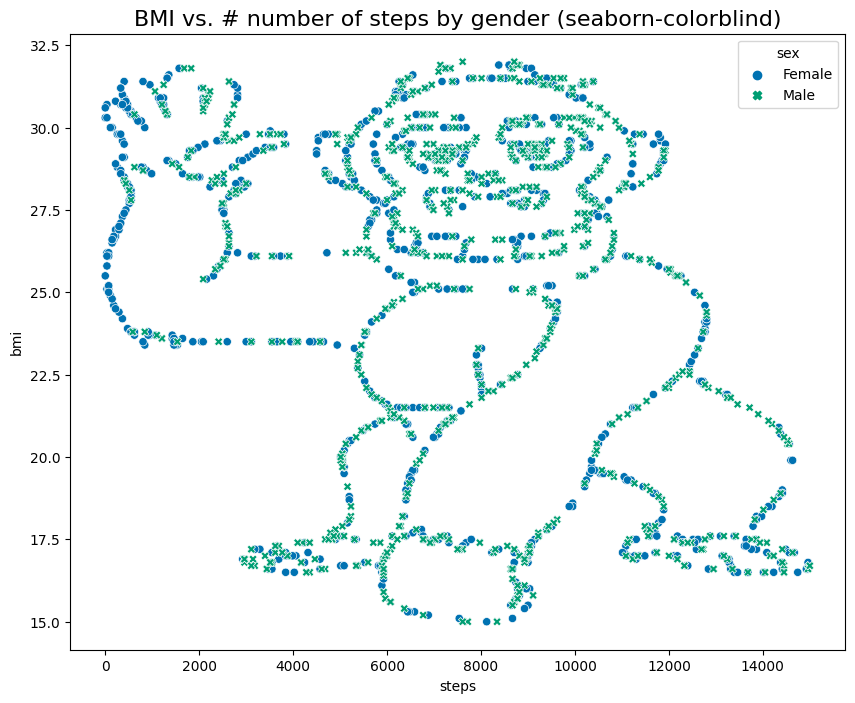

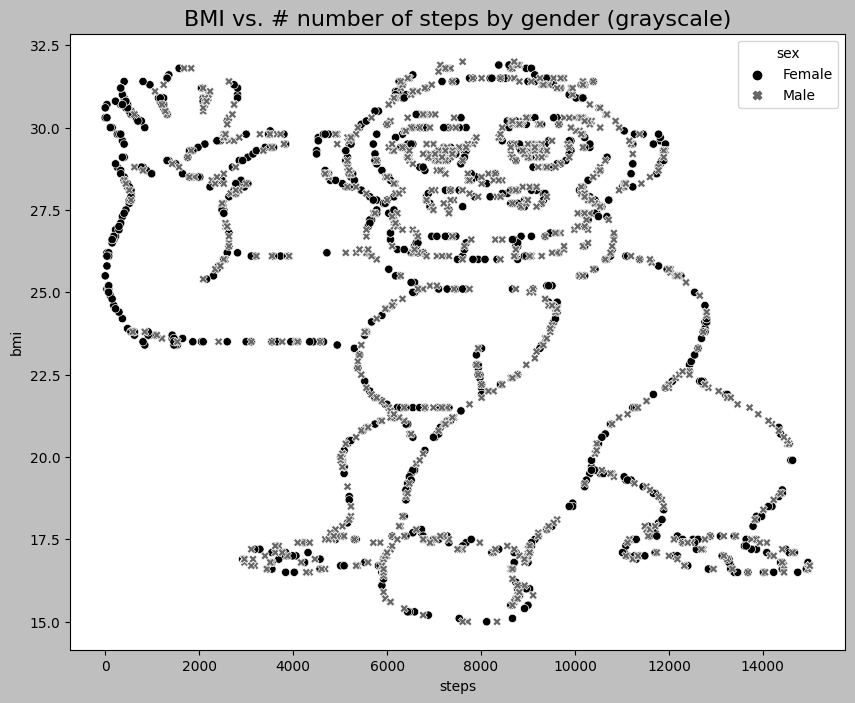

In [18]:
#Colorblind style
matplotlib.rc_file_defaults()
plt.style.use("seaborn-colorblind")
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=df_fm, x="steps", y="bmi", hue="sex", style="sex") 
plt.title("BMI vs. # number of steps by gender (seaborn-colorblind)", fontsize=16)
plt.show()

#Grayscale
matplotlib.rc_file_defaults()
plt.style.use("grayscale")
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=df_fm, x="steps", y="bmi", hue="sex", style="sex", markers=["o", "X"])
plt.title("BMI vs. # number of steps by gender (grayscale)", fontsize=16)
plt.show()
matplotlib.rc_file_defaults()

**Scatterplots pros and cons:**

**Pros**:
- Great for exploratory investigation of the data as they are quick and easy to use.
- Can visualize correlations between the two variables
- Better suited for continous data.
- Shows all data points, including outliers.

**Cons**:
- Ineffective for discrete or categorical data, such as integer data (for instance, number of cylinders in cars against milege).
- Interpretation is highly subjective 
- Only two variables are compared
    - Workaround: use colors to encode categories or time.

## Part 3: Different types of visualization from DAOST

<h5 style="background-color:LemonChiffon"><i><b>3.1: </i></b>Janert, the author of DAOST, is so suspicious of mean, median, and related summary statistics. Explain why one has to be careful when using those - and why visualization of the full data is always better.
</h5>

Mean, median, and related summary statistics apply only to distributions that have a single, central peak—that is, to unimodal distributions. If this basic assumption is not fulfilled, then conclusions based on simple summary statistics will be wrong. Even worse, nothing will tip you off that they are wrong: the numbers will look quite reasonable.$^1$ Visualization of the full data on the other hand, allows you to really understand the distribution of the data, and therefore the correct analysis approach.

$^{1. \text{ Data Analysis with Open Source Tools - Philipp Janert (O'Reilly)}}$

<h5 style="background-color:LemonChiffon"><i><b>3.2: </i></b>Explain what is a box plot. When are box plots most useful? Are violin plots better or worse than box plots? Why?
</h5>

A box plot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles. They are represented using a squared figure, with two opposite lines that exit the box and represent the variability outside the upper and lower quantile. This data visualization emphasizes the overall structure of the data sets and makes it easy to compare different data sets based on their location and width.$^2$ Violin plots are more informative than plain box plots. While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data. The difference is particularly useful when the data distribution is multimodal (more than one peak). In this case a violin plot shows the presence of different peaks, their position and relative amplitude. [[source]](https://en.wikipedia.org/wiki/Box_plot)

<h5 style="background-color:LemonChiffon"><i><b>3.3: </i></b>Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. We'll use data from the 15 focus crimes defined in Part 1.
For the full time-span of the data, calulate the number of crimes per day within each category for the entire duration of the data. Create a box and whiskers plot showing the mean, median, quantiles, etc. for all 15 crime-types side-by-side. What does this plot reveal that you can't see in the plots from previous weeks?
</h5>

Text(0.5, 0, 'Crime')

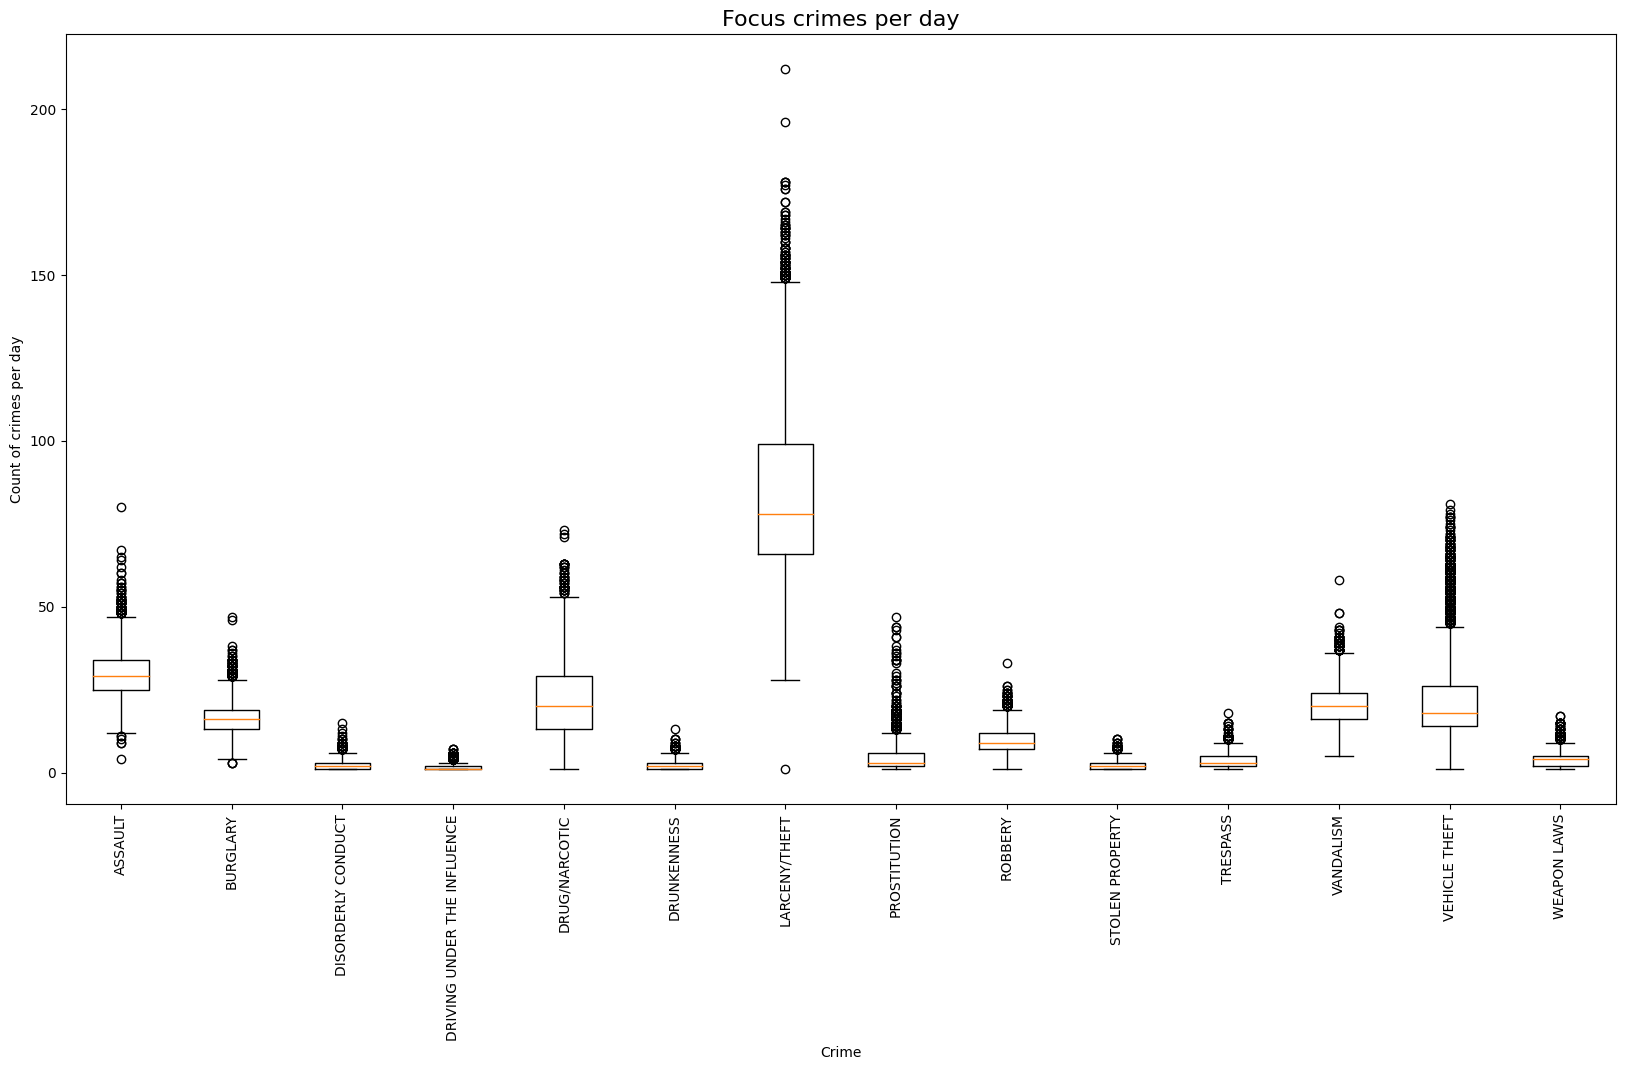

In [20]:
#Get the daily crime by category:
counts = df.groupby(by=["Date", "Category"]).size().reset_index(name="counts")
vals = []
for c in focuscrimes:
    tmp = counts.loc[counts["Category"] == c].reset_index(drop=True)
    vals.append(tmp["counts"])

#Boxplotting
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Focus crimes per day", fontsize=16)
ax.boxplot(vals)
ax.set_xticklabels(focuscrimes, rotation=90)
ax.set_ylabel("Count of crimes per day")
ax.set_xlabel("Crime")

**Comments:** 

These plots reveal that most of the outliers are above the mean, as expected considering that most of them have quite a low mean and the variance almost reach the bottom. Also, the majority of crime types have quite narrow first quantiles, meaning that the number of crimes occurred is quite stable through the days. Lastly, it is worth mention that this kind of representation allow us to easily compare the various types of crime, which one occurs more often and which one has high/low variance.

<h5 style="background-color:LemonChiffon"><i><b>3.4: </i></b>Now, let's calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is the average time-of-day that a crime takes place. Now, you can create box-plots to create an overview of when various crimes occur. Note that these plot have quite a different interpretation than ones we created in the previous exercise. Comment your results.
</h5>

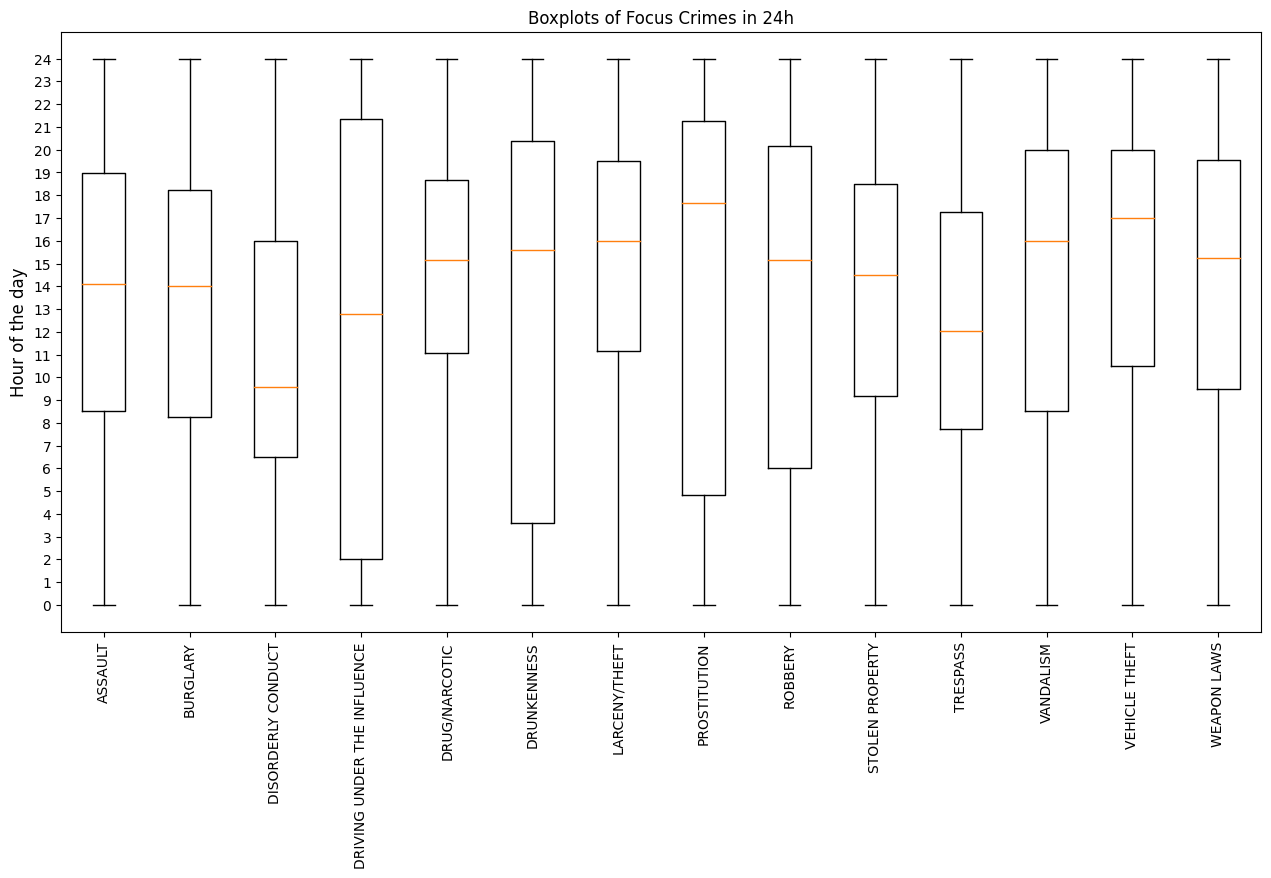

In [21]:
#Creating box plots for visualization of what time of day the crime occours

#Changing the time to the corresponding hours
crime_data_time= df[['Category', 'IncidntNum','Time']].copy()
crime_data_time['Time'] = crime_data_time['Time'].apply(lambda x: x.minute/60+x.hour)

#Putting all relevant datasets in a list
indicent_time=[]
for crime_type in focuscrimes:  # plot for every category
    crime_df = crime_data_time[crime_data_time["Category"] == crime_type]
    a = crime_df["Time"]
    indicent_time.append(a)  
    
#Plotting boxplots
fig = plt.figure(figsize =(12, 6))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
ax.boxplot(indicent_time)
ax.set_xticklabels(focuscrimes)
ax.set_title('Boxplots of Focus Crimes in 24h')
plt.xticks(rotation=90)
plt.yticks(range(0,25))
plt.ylabel("Hour of the day", fontsize=12)

# show plot
plt.show()

**Comments:** 

This kind of representation does not provide qualitative information about the data since many of these focuscrime appear to have too high variance. One reason for this is that some of this crime types mostly happen at night, but the y axis goes from 00:00 to 23:59, making it really hard to understand the true distribution of the data. The variance of all the boxplot spans over all the day, proving that there is not a precise time of the day in which a crime is usually not recorded.

To see a detailed distribution of each crime per hour for each category, the following **violin plots** are provided. We overlay the boxplots over the violin plots to illustrate the lose of information from the boxplots. Each crime is plotted separately so that each distribution is clear.

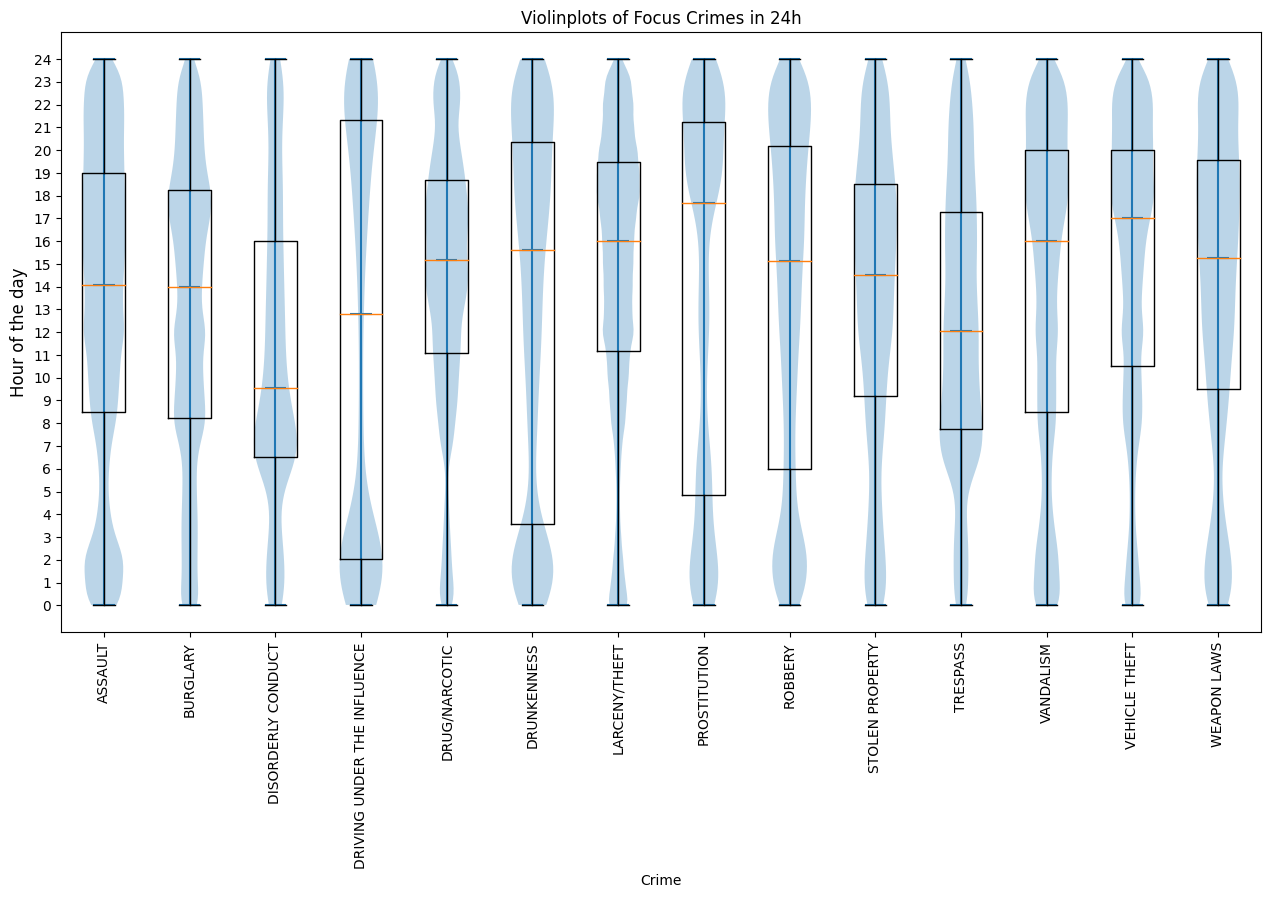

In [31]:
#Plotting violin plots
fig = plt.figure(figsize =(12, 6))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
ax.violinplot(indicent_time,showmedians=True)
ax.boxplot(indicent_time)
ax.set_xticklabels(focuscrimes)
ax.set_title('Violinplots of Focus Crimes in 24h')
plt.xticks(rotation=90)
plt.yticks(range(0,25))
plt.ylabel("Hour of the day", fontsize=12)
plt.xlabel("Crime")

# show plot
plt.show()

**Comment:** 

Using a violin plot we can clearly visualize the distribution of the data throughout the day. By examining for example `PROSTITUTION` or `DRIVING UNDER THE INFLUENCE` it is very noticeable that the great majority of this crimes are reported at night. Having a y-axis starting from 0 and 24 hours will wrongly place the mean close to the middle of the day. Note the significant loss of information from using the boxplots; it does not mean that boxplots are useless, they are just another tool in the data scientist's toolbox. One strength of boxplots is comparing similarly distributed populations side-by-side. 

## PART 4: Visualizing geo-data

Let's now use the cool Folium functionalites `HeatMap` and `HeatMapWithTime` to create a visualization of the patterns of your favorite crime-type and how they change over time. 

<h5 style="background-color:LemonChiffon"><i><b>4.1: </i></b>Start by choosing a crimetype with spatial patterns that change over time. Use your data-exploration from the previous lectures to choose a good one.
</h5>

We chose the crimetype `PROSTITUTION` as the crime type for further analysis, as it showed interesting patterns already in previous analyses.

<h5 style="background-color:LemonChiffon"><i><b>4.2: </i></b>Create a heatmap by grabbing your crimetype data across all times. Play with parameters to get plots you like and explain why you chose them and what the effect of these parameters are.
</h5>

In [23]:
#ignore warnings
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

#Create new filtered dataset and modify data - put in appropriate order
crime_data_hm = df[df['Category']=='PROSTITUTION']

# Filter the DF for rows, then columns, then remove NaNs
crime_data_hm = crime_data_hm[['Y', 'X']]
crime_data_hm = crime_data_hm.dropna(axis=0, subset=['Y','X'])

# List comprehension to make out list of lists
crime_list_hm = [[row['Y'],row['X']] for index, row in crime_data_hm.iterrows()]

# Create map with standard parameters
map_crime_normal = folium.Map(location=[37.77, -122.43],
                    tiles = "Stamen Toner",
                    zoom_start = 12) 

# Plotting it as a heatmap on the map
HeatMap(crime_list_hm).add_to(map_crime_normal)

# Display the map
map_crime_normal

**Comment:**

This heatmap does not show the true "hotspots" for prostitution, because most of the map is red and thus indicating a hotspot. To visualise the crime distribution a bit more precisely, we reduce the radius and blurr of the heatmap and introduce another color-gradient.

In [24]:
# Create modified map
map_crime_hm = folium.Map(location=[37.77, -122.43],
                    tiles = "Stamen Toner",
                    zoom_start = 12) 

# Plotting it as a heatmap on the map
HeatMap(crime_list_hm,
        radius=20,
        blur=20,
        max_opacity=0.8,
        gradient={0.2:'orange',0.4:'yellow',0.5:'lime',0.7: 'green', 0.8: 'blue', 0.9: 'purple',1:'red',}
       ).add_to(map_crime_hm)

# Display the map
map_crime_hm

**Comment:**

This map shows the hot-spots for prostitution more accurately, while still showing that this crime is widely distributed in the city. By reducing the radius and blurr, the colored areas become smaller and by adjusting the  color-gradient, the visualisation of hotspots and distribution can be made more clear.

<h5 style="background-color:LemonChiffon"><i><b>4.3: </i></b>Now, choose a time-resolution. You could plot daily, weekly, monthly datasets to plot in your movie. Again the goal is to find interesting temporal patterns to display. We want at least 20 frames though. Create the movie using HeatMapWithTime.
</h5>

In [25]:
#still using the data for prostitution

#Create heatmap over time, showing incidents that happened sorted by hour for all available data
crime_data_hm['Weight'] = df['Hour']
crime_data_hm['Weight'] = crime_data_hm['Weight'].astype(float)
crime_data_hm = crime_data_hm.dropna(axis=0, subset=['Y','X', 'Weight'])

#sort the weights
weight_range=crime_data_hm['Weight'].unique()
weight_range=sorted(weight_range)

#convert to list
list_hm_time = [[[row['Y'],row['X']] for index, row in crime_data_hm[crime_data_hm['Weight'] == i].iterrows()] for i in weight_range]

#create map
map_time_hm = folium.Map(location=[37.77, -122.43],
                    zoom_start = 12) # Uses lat then lon. The bigger the zoom number, the closer in you get
hm = plugins.HeatMapWithTime(list_hm_time,
                             auto_play=True,
                             radius=30,
                             max_opacity=0.8,
                             gradient={0.2:'orange',0.4:'yellow',0.5:'lime',0.7: 'green', 0.8: 'blue', 0.9: 'purple',1:'red',},
                             display_index=True,
                            )
hm.add_to(map_time_hm)
map_time_hm

**Comment:** 

The time series display the occurences of prostitution through the 24h of the day. One can easily see, that more prostitution happens at night, however, it's surprising that there are still quite a lot of incidents also during the day and at every hour of the day. Also the distribution of the incidents changes slightly over time, concentrating very much in eastern San Francisco in the late hours.

<h5 style="background-color:LemonChiffon"><i><b>4.3: </i></b>Comment on your results: What patterns does your movie reveal?

As mentioned above, the time series shows the occurences of prostitution through the 24h of the day. Thereby, it visualizes that the most common area for prostitution at any time is the downtown area in north-eathern San Francisco. However, there are also many individual occurences of prostitution all over the city. Unsurprisingly most incidents happen in the evening hours, yet there are incidents all over the day. From midday to the earlier evening hours, the eastern side of the city shows a second hotspot area and the incidents spread out wider over the city, while in the late evening hours and morning hours, it is very focussed on the inner city.

<h5 style="background-color:LemonChiffon"><i><b>4.3: </i></b>  
- Motivate/explain the reasoning behind your choice of crimetype and time-resolution (you can also refer to  exercises/visualizations that we have done in class to motivate your choice). 

Prostitution was chosen as a crime type to investigate the occurences throughout the day-hours because there is a clear stereotype of the crime mainly happening in the night, that we were curious to see if this was represented in the data. The prejudice was mainly confirmed by the data, yet it is surprising to see that there are also many incidents occuring at any hour of the day. The graph from exercise 1.2 already indicated such a result, yet the geographical time-series makes outlines this finding more clearly, furthermore showing the wide distribution over the city.

## Part 5: Errors in the data. 

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data. 

1. In the temporal activity for `PROSTITUTION` something surprising is going on on Thursday. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/prostitution.png), where I've highlighted the phenomenon I'm talking about.
2. When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/jitter.png), where I've highlighted the phenomenon I'm talking about.
3. And, during Week 4 we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/crime_hot_spot.png).

<h5 style="background-color:LemonChiffon"><i><b>5.1: </i></b>In each of the examples above, describe in your own words how the data-errors, I call attention to above, can bias the binned versions of the data. Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).

Outliers can highly influence the data and conceptions of the data, especially when putting it into predefined bins. 

**In example 1)** it can yield the idea that prostitution is most commonly happening on Thurdays. When not noticing this error possibly wrong attention is drawn to prostitution incidents, maybe even with increased amount of patrillions on the streets to avoid the crime. 

**In example 2)** the human noise leads to non-constant/ categorical distributions. It shows that is does not make sense to look into the time-frequencies too closly, and some common sense is necessary when thinking about making assumptions that crimes happen most commonly on the full hours. More likely, police officers tend to note down full hours or half hours more commonly when recording a crime. 

**In example 3)** it is likely that some mistake was made when choosing the incidence or location of the incident. These kind of errors can lead to wrong distributions of the crimes. It could also be due to the heavy police presence in the area, which drives criminals else where, or some corrupt policemen don't report on each other when they commit the crime.

<h5 style="background-color:LemonChiffon"><i><b>5.2: </i></b>Find your own example of human noise in the data and visualize it. Comment your results.

Visualizing the incidents of arrest due to Larceny/Theft over Christmas 2016.

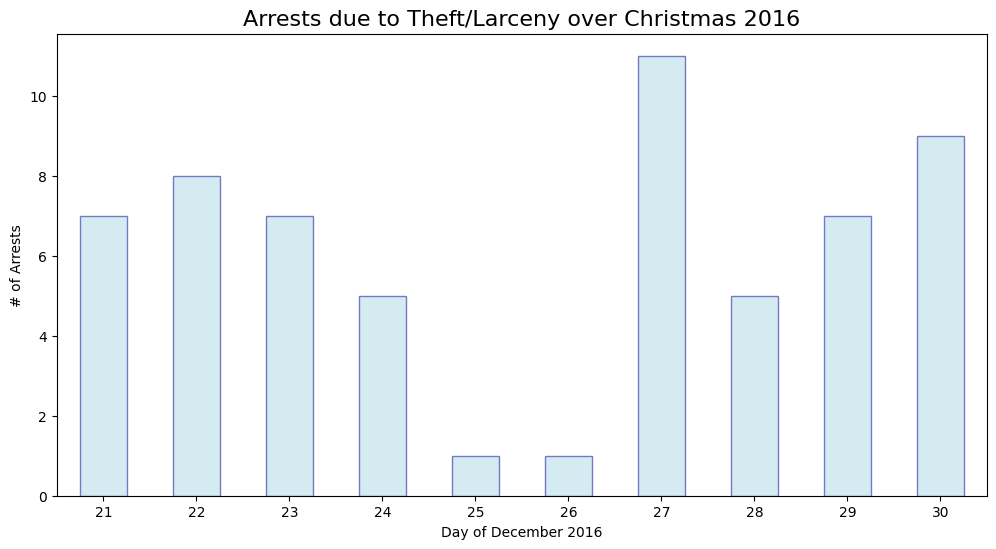

In [26]:
#Reducing the dataframe
crime_data_red=df[df['Category']=='LARCENY/THEFT']

#Bringing the "Date" column into datetime format to sort it
crime_data_red["Date"] = pd.DatetimeIndex(crime_data_red['Date'])

#Choose time interval and reduce data
start_date='2016-12-20'
end_date='2016-12-30'
mask = (crime_data_red['Date'] > start_date) & (crime_data_red['Date'] <= end_date)
crime_data_red=crime_data_red.loc[mask]

#Filter incidents of no arrest out
crime_data_red=crime_data_red[crime_data_red['Resolution']!= 'NONE']

#Convert date back to string
crime_data_red["Date"] = crime_data_red["Date"].apply(lambda x: dt.datetime.strftime(x, '%d'))

#Grouping the data by date
a=crime_data_red.groupby(["Date"]).count()["IncidntNum"]

#Plotting
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
axes=a.plot(kind="bar", rot=0, color="lightblue", edgecolor="darkblue", alpha=0.5)
plt.subplots_adjust(hspace=1.5)

axes.set_ylabel("# of Arrests")
axes.set_xlabel("Day of December 2016")
axes.set_title('Arrests due to Theft/Larceny over Christmas 2016', fontsize=16)
print()

**Comment:** 

The idea for the visualization is that human noise becomes evident around holiday days. As it is most likely that less cases are recorded and less people are arrested during these days, due to lower number of people on working shift, or due to the fact that many people where on holidays and only discovered the crime days later. These cases are then only registered once the holidays are over. 

This behavior can be seen in the example above for Theft/Larceny incidents. On the two holiday days, the 25th and 26th of December, only very few arrests were happening for the focus crime and then on the 27th the number of incidents suddenly rises significantly. This can lead to wrong conclusions about the amount of crimes happening during holiday days / after holiday days.